In [1]:
import pandas as pd

df1 = pd.read_csv('reviews2.txt', sep='delimiter', header=None, engine='python')
df2 = pd.read_csv('stars.txt', sep='delimiter', header=None, engine='python')
print(len(df1))
print(len(df2))

# df = pd.concat([df1, df2], axis=1, ignore_index=True)
# df.columns = ['review', 'stars']
# df.head()

1621
1621


In [2]:
df1.columns = ['review']
df2.columns = ['stars']

print(df1.head())
print(df2.head())

                                              review
0  https://www.amazon.com/Stereo-Portable-Headpho...
1  They are great for the price and fit perfectly...
2  Wife loves these for plugging into Roku remote...
3  Excellent quality, sound, and yet, they are no...
4  A very short review: These are wonderful headp...
                                               stars
0  https://www.amazon.com/Stereo-Portable-Headpho...
1                                                4.0
2                                                4.0
3                                                4.0
4                                                4.0


In [3]:
df1 = df1[df1["review"].str.startswith("http")==False]
# df1 = df1.drop(df1.iloc[0].name)
df1 = df1.reset_index()
df1.columns = ['n', 'review']
df1 = df1.drop(['n'], axis=1)
df1

,review
0,They are great for the price and fit perfectly...
1,Wife loves these for plugging into Roku remote...
2,"Excellent quality, sound, and yet, they are no..."
3,A very short review: These are wonderful headp...
4,Buenos!!!
...,...
1460,I have been ordering these for years. I usual...
1461,Audio from tablet and laptop with fan blowing ...
1462,Item Description: set of 5 basic headphones.Pr...
1463,Great price


In [4]:
df2 = df2[df2["stars"].str.startswith("http")==False]
df2 = df2.reset_index()
df2.columns = ['n', 'stars']
df2 = df2.drop(['n'], axis=1)
df2

,stars
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
1460,4.0
1461,2.0
1462,5.0
1463,5.0


In [5]:
print(len(df1), len(df2))

1465 1465


In [6]:
# df = pd.concat([df, df1], axis=1)
# df = pd.concat([df, df2], axis=1)
df = pd.concat([df1, df2], axis=1, ignore_index=True)
df.columns = ['review', 'stars']

In [7]:
# df.to_csv('data.csv', index=False)
df.head()
# len(df)

,review,stars
0,They are great for the price and fit perfectly...,4.0
1,Wife loves these for plugging into Roku remote...,4.0
2,"Excellent quality, sound, and yet, they are no...",4.0
3,A very short review: These are wonderful headp...,4.0
4,Buenos!!!,4.0


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~LDA~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
import os
from pprint import pprint

import gensim
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
# import pyLDAvis.sklearn
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df['review'] = [re.sub(r'\S*@\S*\s?', '', sent) for sent in df['review']]
df['review'] = [re.sub(r'\s+', ' ', sent) for sent in df['review']]
df['review'] = [re.sub(r"\'", "", sent) for sent in df['review']]

df['processed'] = df['review'].map(lambda x: re.sub('[,\.!?]', '', x))
df['processed'] = df['review'].map(lambda x: x.lower())

In [ ]:
len(df)
df.head()

,review,stars,processed
0,They are great for the price and fit perfectly...,4.0,they are great for the price and fit perfectly...
1,Wife loves these for plugging into Roku remote...,4.0,wife loves these for plugging into roku remote...
2,"Excellent quality, sound, and yet, they are no...",4.0,"excellent quality, sound, and yet, they are no..."
3,A very short review: These are wonderful headp...,4.0,a very short review: these are wonderful headp...
4,Buenos!!!,4.0,buenos!!!


In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
  for sentence in sentences:
    yield (gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = df['processed'].values.tolist()
data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)

In [ ]:
print(data_words[:1][0][:30])

['great', 'price', 'fit', 'perfectly', 'guy', 'small', 'head']


In [ ]:
import gensim.corpora as corpora  # Create Dictionary
id2word = corpora.Dictionary(data_words)  # Create Corpus
texts = data_words  # Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]  # View

In [ ]:
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [ ]:
from pprint import pprint
num_topics = 5
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"sound" + 0.017*"headphones" + 0.007*"like" + 0.007*"music" + '
  '0.006*"noise" + 0.006*"bass" + 0.006*"really" + 0.005*"also" + '
  '0.005*"would" + 0.005*"im"'),
 (1,
  '0.015*"headphones" + 0.011*"sound" + 0.008*"like" + 0.007*"quality" + '
  '0.007*"good" + 0.006*"great" + 0.006*"ear" + 0.005*"noise" + 0.005*"get" + '
  '0.005*"bass"'),
 (2,
  '0.020*"headphones" + 0.012*"sound" + 0.009*"bass" + 0.007*"like" + '
  '0.006*"music" + 0.006*"quality" + 0.006*"good" + 0.005*"really" + '
  '0.005*"headset" + 0.005*"better"'),
 (3,
  '0.026*"headphones" + 0.018*"sound" + 0.010*"good" + 0.009*"quality" + '
  '0.008*"like" + 0.007*"noise" + 0.006*"bass" + 0.006*"music" + '
  '0.006*"better" + 0.005*"ear"'),
 (4,
  '0.015*"headphones" + 0.015*"sound" + 0.009*"good" + 0.008*"quality" + '
  '0.007*"like" + 0.006*"noise" + 0.005*"ear" + 0.005*"would" + 0.005*"better" '
  '+ 0.005*"well"')]


In [ ]:
# !pip install bertopic

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer, util
from umap import UMAP

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~WORD2VEC~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
from gensim import models
from gensim.models import Word2Vec

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import gensim.downloader as api
corpus = api.load('text8')
import inspect                                                                  #downloads ready vocabulary, comment if already saved
print(inspect.getsource(corpus.__class__))
print(inspect.getfile(corpus.__class__))
model = Word2Vec(corpus)
model.save('./readyvocab.model')

[==================================================] 100.0% 31.6/31.6MB downloaded
class Dataset(object):
    def __init__(self, fn):
        self.fn = fn

    def __iter__(self):
        corpus = Text8Corpus(self.fn)
        for doc in corpus:
            yield doc

/root/gensim-data/text8/__init__.py


In [ ]:
model = Word2Vec.load('readyvocab.model')       #reads the vocabulary

processed_sentences = []
for sentence in df['processed']:
  processed_sentences.append(gensim.utils.simple_preprocess(sentence))        #for every sentence in tweets tokenizes each words

vectors = {}
i = 0
for v in processed_sentences:
  vectors[str(i)] = []
  for k in v:
    try:
      vectors[str(i)].append(model.wv[k].mean())      #appends the vector of the word
    except:
      vectors[str(i)].append(np.nan)      #if the word doesnt exist the vocabulary insert it as a Nan value
  i += 1

df_input = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in vectors.items()]))      #puts the vectors in a dataframe
df_input.fillna(value=0.0, inplace=True)        #replace Nan values with 0

df_input = df_input.transpose()     #transposes the matrices in order to insert into the models

In [ ]:
df_input.head()

,0,1,2,3,4,5,6,7,8,9,...,2845,2846,2847,2848,2849,2850,2851,2852,2853,2854
0,-0.104423,-0.101926,-0.003204,0.170193,-0.096911,0.040692,-0.085191,0.057789,-0.073033,0.170193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.096328,-0.031212,-0.337413,0.170193,-0.008935,0.141500,0.000000,0.023921,-0.134138,0.059067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.099659,-0.108080,-0.108674,-0.085191,-0.142205,-0.104423,-0.101926,-0.085731,0.229774,-0.096911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.060201,0.066890,0.044998,-0.337413,-0.101926,-0.015511,-0.021019,-0.059112,0.005439,-0.101926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SKLEARN~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
from sklearn import svm
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from random import uniform
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_input, df['stars'], test_size=0.3, random_state=42)     #splits df in train, test, random_state=42 so it splits with the same way each time

In [ ]:
y_train

In [ ]:
 #Logistic Regression
log = LogisticRegression()

                                    #hyperparameter tuning
distributions = dict(       #dictionary with parameters of logistic regression
    solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    penalty=['l2', 'none', 'l1', 'elasticnet']
    )

random_search_cv = RandomizedSearchCV(      #random search between above parameters to find the best
    estimator=log,
    param_distributions=distributions,
    cv=5,
    n_iter=50       #how many times it checks them
    )

random_search_cv.fit(X_train, y_train)      #fits the data into the model
print(f'\nBest parameters for Logistic Regression: {random_search_cv.best_params_}')


Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2'}


In [ ]:
log = random_search_cv.best_estimator_      #logistic regression with the best parameters

pred = log.predict(X_test)      #prediction of logistic regression
# print('\nf1_score: ', f1_score(y_test, pred, pos_label=0))      #f1 score
print('log_score: ', log.score(X_test, y_test))     #logistic regression score
print('accuracy_score: ', accuracy_score(y_test, pred))     #accuracy_score
print('precision_score: ', precision_score(y_test, pred, average=None))
print('recall_score: ', recall_score(y_test, pred, average=None))

log_score:  0.5045454545454545
accuracy_score:  0.5045454545454545
precision_score:  [0.         0.         1.         0.42857143 0.52124646]
recall_score:  [0.         0.         0.03703704 0.25531915 0.83257919]


In [ ]:
#Decision Tree Classifier
print('\nDecision Tree Classifier:')
scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)  #5 different parameters test
# print(scores)
print('\nMean DTC score: ', scores.mean(), sep='')      #prints mean score of the 5 different parameters

bag_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),       #100 models with different samples and takes the majority vote for score
                              n_estimators=100,
                              max_samples=0.8,
                              oob_score=True,  # oob=out of bag
                              random_state=0)


Decision Tree Classifier:

Mean DTC score: 0.4878048780487805


In [ ]:
bag_model.fit(X_train, y_train)
print('Bagging score: ', bag_model.score(X_test, y_test), sep='')       #bagging score

print('Mean Bagging score: ', cross_val_score(bag_model, X_train, y_train, cv=5).mean(), sep='')        #cross_val_score

print('\nRandom Forest Classifier:')
from sklearn.ensemble import RandomForestClassifier
print('Mean Random Forest score: ', cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5).mean(), sep='')       #cross_val_score of Random Forest Classifier

Bagging score: 0.5113636363636364
Mean Bagging score: 0.5678048780487805

Random Forest Classifier:
Mean Random Forest score: 0.5795121951219512


In [ ]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
# print(classification_report(y_test, predictions))
print('accuracy_score: ', accuracy_score(y_test, predictions))     #accuracy_score
print('precision_score: ', precision_score(y_test, predictions, average=None))
print('recall_score: ', recall_score(y_test, predictions, average=None))

accuracy_score:  0.5159090909090909
precision_score:  [0.         0.         1.         0.57142857 0.5106383 ]
recall_score:  [0.         0.         0.05555556 0.05673759 0.97737557]


In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)

# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
# print(classification_report(y_test, grid_predictions))

print('accuracy_score: ', accuracy_score(y_test, grid_predictions))     #accuracy_score
print('precision_score: ', precision_score(y_test, grid_predictions, average=None))
print('recall_score: ', recall_score(y_test, grid_predictions, average=None))

accuracy_score:  0.5522727272727272
precision_score:  [0.         1.         0.46153846 0.53947368 0.55331412]
recall_score:  [0.         0.23529412 0.11111111 0.29078014 0.86877828]


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~WORDCLOUD~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

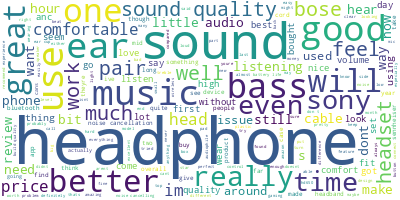

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# https://medium.com/@nick-tan/topic-modeling-with-bertopic-a-cookbook-with-an-end-to-end-example-part-1-3ef739b8d9f8

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BERTOPIC~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
!pip install bertopic

In [13]:
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

In [ ]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

In [ ]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

In [19]:
# Remove stopwords
df['review_without_stopwords'] = df['review'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
df['review_lemmatized'] = df['review_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# Take a look at the data
df.head()

,review,stars,review_without_stopwords,review_lemmatized
0,They are great for the price and fit perfectly...,4.0,great price fit perfectly guy small head,great price fit perfectly guy small head
1,Wife loves these for plugging into Roku remote...,4.0,Wife loves plugging Roku remote watch TV aslee...,Wife love plugging Roku remote watch TV asleep...
2,"Excellent quality, sound, and yet, they are no...",4.0,"Excellent quality, sound, yet, ear. Maybe chil...","Excellent quality, sound, yet, ear. Maybe chil..."
3,A very short review: These are wonderful headp...,4.0,short review: wonderful headphones looking sop...,short review: wonderful headphone looking soph...
4,Buenos!!!,4.0,Buenos!!!,Buenos!!!


In [39]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=4,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['review_lemmatized'])

In [ ]:
# Get the list of topics
topic_model.get_topic_info()

In [41]:
3# Get top 10 terms for a topic
topic_model.get_topic(0)

[('headphone', 0.01933228030526004),
 ('sound', 0.018517962961791597),
 ('bass', 0.014662393689713706),
 ('like', 0.012199942480359119),
 ('music', 0.01144663408330425),
 ('good', 0.011220235181624988),
 ('get', 0.01076582206585749),
 ('better', 0.010456928239390803),
 ('also', 0.00999886451352552),
 ('ear', 0.009997924287944522)]

In [42]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

In [44]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [46]:
topic_model.visualize_documents(df['review_lemmatized'])

In [47]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BERTOPIC2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
#DO NOT REMOVE STOP WORDS BEFORE EMBEDDINGS
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
docs = df['review'].to_list()

In [ ]:
%%time
model_embedding = SentenceTransformer('all-MiniLM-L6-v2')
corpus_embeddings = model_embedding.encode(docs)

CPU times: user 2min 22s, sys: 34.3 s, total: 2min 56s
Wall time: 2min 26s


In [ ]:
%%time
model = BERTopic(
    n_gram_range=(1, 2),
    vectorizer_model=vectorizer_model,
    nr_topics='auto',
    min_topic_size=10,
    seed_topic_list=[
        ["headphone", "good", "sound", "quality"],
        ["work", "use", "good", "comfortable"],
        ["great", "bass", "feel"],
        ["music", "price", "great"]
    ],
    calculate_probabilities=True).fit(docs, corpus_embeddings)

CPU times: user 12.2 s, sys: 130 ms, total: 12.3 s
Wall time: 10.7 s


In [ ]:
topics, probabilities = model.transform(docs, corpus_embeddings)

In [ ]:
df_topic_freq = model.get_topic_freq()
topics_count = len(df_topic_freq) - 1
df_topic_freq

,Topic,Count
0,0,1421
1,1,44


In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_barchart(top_n_topics=topics_count)


In [ ]:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(corpus_embeddings)
model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~CHAT~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
import pandas as pd

# Read the lines from the text file
with open('chat.txt', 'r') as file:
    lines = file.readlines()

# Remove the numbers followed by '.' and space at the beginning of each line
lines = [line[line.index('. ') + 2:] if line.startswith(tuple(map(str, range(1, 10)))) else line for line in lines]

# Extract the reviews and stars from each line
reviews = []
stars = []
for line in lines:
    try:
        review = line[:line.index("(")].strip()
        star = int(line[line.index("(") + 1: line.index(")")])
        reviews.append(review)
        stars.append(star)
    except ValueError:
        continue

# Create a DataFrame with reviews and stars
df2 = pd.DataFrame({'Review': reviews, 'Stars': stars})

# Save the DataFrame to a CSV file
df2.to_csv('headphones_reviews.csv', index=False)
df2.head()

,Review,Stars
0,These headphones offer excellent sound quality...,5
1,The affordable price of these headphones doesn...,4
2,The build quality of these headphones feels ch...,2
3,These wireless headphones provide convenient c...,3
4,"I love the sleek design of these headphones, t...",3


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~BERT~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
! pip install transformers datasets evaluate


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
df.rename(columns={'review': 'text', 'stars': 'label'}, inplace=True)
df['text'] = df['text'].astype('string')
df['label'] = df['label'].astype(float)
df['label'] = df['label'].astype(int)
df['label'] = df['label'] - 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1465 non-null   string
 1   label   1465 non-null   int64 
dtypes: int64(1), string(1)
memory usage: 23.0 KB


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df['review'], df['stars'], test_size=0.3, random_state=42)     #splits df in train, test, random_state=42 so it splits with the same way each time

import datasets

dataset = datasets.Dataset.from_pandas(df)
dataset = dataset.train_test_split(0.3)

In [ ]:
dataset['train'][0]

{'text': 'it starts with pokemon go, and the need to listen for that team rocket balloon. two handed dog walks where i can seamlessly go between ios, windows, and mac os should be heaven but… damn if i didnt reach to chamge the anc and find that thenplastic cracked like low grade lego knickoff and with it came ine ear cup, wire removed clean,y into the headband. now this could be a bad pair affter a mknth - or it could be that ive had this happen 4x and only ince was the damage me and a car wheel in the wrong place. i thinka refund is deserved considering my loyalty but hey, amazon doesnt do nice thjngs',
 'label': 4}

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True)

tokenized_review = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/1025 [00:00<?, ? examples/s]

Map:   0%|          | 0/440 [00:00<?, ? examples/s]

In [ ]:
tokenized_review

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1025
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 440
    })
})

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
id2label = {0: "NEGATIVE", 1: "NEGATIVE NEUTRAL", 2: "NEUTRAL", 3: "POSITIVE NEUTRAL", 4: "POSITIVE"}
label2id = {"NEGATIVE": 0, "NEGATIVE NEUTRAL": 1, "NEUTRAL": 2, "POSITIVE NEUTRAL": 3, "POSITIVE": 4}

In [ ]:
from transformers import create_optimizer
import tensorflow as tf

batch_size = 16
num_epochs = 5
batches_per_epoch = len(tokenized_review['train']) #batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=5, id2label=id2label, label2id=label2id
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

'_self_setattr_tracking: True, _obj_reference_counts_dict: ObjectIdentityDictionary({<_ObjectIdentityWrapper wrapping DistilBertConfig {\n  "_name_or_path": "distilbert-base-uncased",\n  "activation": "gelu",\n  "architectures": [\n    "DistilBertForMaskedLM"\n  ],\n  "attention_dropout": 0.1,\n  "dim": 768,\n  "dropout": 0.1,\n  "hidden_dim": 3072,\n  "id2label": {\n    "1": "NEGATIVE",\n    "2": "NEGATIVE NEUTRAL",\n    "3": "NEUTRAL",\n    "4": "POSITIVE NEUTRAL",\n    "5": "POSITIVE"\n  },\n  "initializer_range": 0.02,\n  "label2id": {\n    "NEGATIVE": 1,\n    "NEGATIVE NEUTRAL": 2,\n    "NEUTRAL": 3,\n    "POSITIVE": 5,\n    "POSITIVE NEUTRAL": 4\n  },\n  "max_position_embeddings": 512,\n  "model_type": "distilbert",\n  "n_heads": 12,\n  "n_layers": 6,\n  "pad_token_id": 0,\n  "qa_dropout": 0.1,\n  "seq_classif_dropout": 0.2,\n  "sinusoidal_pos_embds": false,\n  "tie_weights_": true,\n  "transformers_version": "4.30.2",\n  "vocab_size": 30522\n}\n>: 1, <_ObjectIdentityWrapper wrap

In [ ]:
tf_train_set = model.prepare_tf_dataset(
    tokenized_review['train'],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator
)

ImportError: ignored

In [ ]:
import tensorflow as tf

model.compile(optimizer=optimizer)  # No loss argument!

In [ ]:
from transformers.keras_callbacks import KerasMetricCallback

metric_callback = KerasMetricCallback()

TypeError: ignored

In [ ]:
model.fit(X_train, y_train,, validation_data=(X_test, y_test), epochs=3, callbacks=callbacks)